# PREPARATION

## import librairies

In [1]:
# Indispensables
import pandas as pd
import numpy as np
#import geopandas as gpd
#import math

# general
import os
from os import listdir
#from os.path import isfile, join
#from os import walk
import sys
import io
import glob
import platform
#
print(os.name, "\n", platform.system(), "\n", platform.release())
#
import argparse
#from datetime import datetime
#import h5py
#import importlib

# VISU
import seaborn as sns
import matplotlib.pyplot as plt
#import matplotlib.colors as mcolors
#from matplotlib.colors import LogNorm

# IMAGES
#from IPython.display import Image, IFrame
#from PIL import Image
#import rasterio
import imageio

import colorsys

print('Panda version: %s' % pd.__version__)
print('Numpy version: %s' % np.__version__)
#print('Geo Panda version: %s' % gpd.__version__)

%matplotlib inline

posix 
 Darwin 
 18.7.0
Panda version: 0.25.1
Numpy version: 1.17.2


In [2]:
from __future__ import print_function

# Machine Lerning
import tensorflow as tf
import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation     #LSTM
from keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D
from keras import backend as K
from keras.callbacks import History

from keras.optimizers import SGD
from keras.regularizers import l2

print('TensorFlow: %s' % tf.__version__)
print('Keras: %s' % keras.__version__)

TensorFlow: 2.0.0
Keras: 2.3.1


Using TensorFlow backend.


## Déclaration des directories et variables

In [3]:
BASE_DIR = os.getcwd()

separe = "/"
# Laptop
if platform.system() == 'Darwin' and platform.release() == '18.7.0':
    DATA_DIR  = "/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DATA1/"
    DATA_DIR2 = "/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DATA2/"
    DATA_DIR3 = "/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/"
# sur IMAC
else:   #if platform.system() == 'Darwin' and platform.release() == '18.0.0':
    DATA_DIR  = "/Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/DATA1/"
    DATA_DIR2 = "/Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/DATA2/"
    DATA_DIR3 = "/Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/"
## Eurométropole
if platform.system() == 'Windows':
    DATA_DIR  = "S:\\Commun\\SIG3D\\2020\\PROJETS_2020\\20039_MachineLearning\\DATA\\"
    DATA_DIR2 = "S:\\Commun\\SIG3D\\2020\\PROJETS_2020\\20039_MachineLearning\\DATA2\\"
    DATA_DIR3 = "C:\\Users\\STG3841\\Mes Documents (local)\\travail\\"
    separe = "\\"   
    
DALLE_NUM = DATA_DIR + "DallesNumPoints5m" + separe
DALLE_ECA = DATA_DIR + "DallesEcartZ5m" + separe
DALLE_POS = DATA_DIR + "DallesPosition5m" + separe
print("Working directory:",BASE_DIR)
print("Data ROOT directory:",DATA_DIR)

sys.path.append(DATA_DIR)
sys.path.append(os.path.join(DATA_DIR,'DallesNumPoints5m\\'))
sys.path

Working directory: /Users/pierreleisy/C-PYTHON/training-Python/NOTEBOOK
Data ROOT directory: /Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DATA1/


['/Users/pierreleisy/C-PYTHON/training-Python/NOTEBOOK',
 '/Users/pierreleisy/Data_Science/anaconda3/envs/geo_env/lib/python37.zip',
 '/Users/pierreleisy/Data_Science/anaconda3/envs/geo_env/lib/python3.7',
 '/Users/pierreleisy/Data_Science/anaconda3/envs/geo_env/lib/python3.7/lib-dynload',
 '',
 '/Users/pierreleisy/.local/lib/python3.7/site-packages',
 '/Users/pierreleisy/Data_Science/anaconda3/envs/geo_env/lib/python3.7/site-packages',
 '/Users/pierreleisy/Data_Science/anaconda3/envs/geo_env/lib/python3.7/site-packages/IPython/extensions',
 '/Users/pierreleisy/.ipython',
 '/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DATA1/',
 '/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DATA1/DallesNumPoints5m\\']

## création des listes d'images

In [4]:
#liste1 = [f for f in listdir(DALLE_NUM) if isfile(join(DALLE_NUM, f))]
liste_1 = [f for f in glob.glob(DALLE_NUM + separe + "*.tif", recursive=True)]#   #only first N for test
liste_2 = [f for f in glob.glob(DALLE_ECA + separe + "*.tif", recursive=True)]#
liste_3 = [f for f in glob.glob(DALLE_POS + separe + "*.tif", recursive=True)]#
print(len(listdir(DALLE_NUM)), len(liste_1), len(liste_2), len(liste_3))

liste_NUM = os.listdir(DALLE_NUM)
liste_ECA = os.listdir(DALLE_ECA)
liste_POS = os.listdir(DALLE_POS)
print(len(liste_NUM), len(liste_ECA), len(liste_POS))

58771 29384 29384 29384
58771 58773 58768


# DONNEES

## TEST:  Lecture des images

## lecture/creation fichier/dataframe lampes des lampadaires présents dans la dalle 1x1 km

In [5]:
# Intialisation des variables de la dalle
fich_lamp  = DATA_DIR  + "LampadairePresence_0_1_5m.asc"
fich_lamp2 = DATA_DIR2 + "listepositif.xlsx"

header = pd.read_csv(fich_lamp, sep=" ", header=None, skiprows=0, nrows=5, names=["noms","valeurs"])
n_row =  header['valeurs'][0]
n_col =  header['valeurs'][1]
xlow = header['valeurs'][2]
ylow = header['valeurs'][3]
cell_size = header['valeurs'][4]
print("Bord inférieur gauche:", xlow, ylow, n_row, n_col, cell_size)

lampadaires = pd.read_csv(fich_lamp, sep=" ", header=None, skiprows=6)
print(lampadaires.sum().head(5))
print(lampadaires.nunique().agg(['mean','count','sum']))
##################################
# reconstruit le tableau dans le bon schéma usuel
# calcule la transposee
lampadaires = lampadaires.T
# inversion des colonnes (nombre pair de colonnes, mais pas nécessaire)
lampadaires = lampadaires[lampadaires.columns[::-1]]
##################################
lampes0 = pd.DataFrame(np.reshape(lampadaires.to_numpy(), n_row*n_col))

lampes2 = pd.read_excel(fich_lamp2, header=0, skiprows=0)
print(lampadaires.shape, lampes0.shape, lampes2.shape)
#print(lampadaires.describe())
print(lampadaires.sum().sum())
lampes2.head(5)

Bord inférieur gauche: 2042500 7272000 200 200 5
0    3.0
1    4.0
2    6.0
3    2.0
4    1.0
dtype: float64
mean       1.79
count    200.00
sum      358.00
dtype: float64
(200, 200) (40000, 1) (355, 5)
357.0


,_column,_row,_overlaps,posX,posY
0,0,80,1,2042502,7272402
1,0,92,1,2042502,7272462
2,0,102,1,2042502,7272512
3,0,106,1,2042502,7272532
4,0,169,1,2042502,7272847


## rempli le dataframe lampes0 et lampes1

In [6]:
lampes0['NumI'] = lampes0.index
lampes0['NumY'] = lampes0['NumI'].mod(other=n_col)
lampes0['NumX'] = ((lampes0['NumI'] - n_row + 1) / n_row).apply(np.ceil)
#lampes = lampes.drop(['Num'], axis=1)
lampes0.rename(columns={0: 'present'}, inplace=True)
lampes0 = lampes0.astype({'present': 'int8'}, copy=False)
lampes0 = lampes0.astype({'NumY': 'int32'}, copy=False)
lampes0 = lampes0.astype({'NumI': 'int32'}, copy=False)
lampes0 = lampes0.astype({'NumX': 'int32'}, copy=False)
print(lampes0.dtypes)
#print(lampes.describe(include='all'))
lampes0['X'] = xlow + lampes0['NumX'] * cell_size
lampes0['Y'] = ylow + lampes0['NumY'] * cell_size
lampes0['nom_NUM'] = lampes0['X'].map(str) + "_" + lampes0['Y'].map(str) +  "_NumPoints5m.tif"
lampes0['nom_ECA'] = lampes0['X'].map(str) + "_" + lampes0['Y'].map(str) + "_EcartZ5m.tif"
lampes0['nom_POS'] = lampes0['X'].map(str) + "_" + lampes0['Y'].map(str) +  "_Position5m.tif"
# extraction des lampadaires
lampes1 = lampes0[lampes0['present'] > 0]
print("Dalle:", lampes0.shape, "Nbre lampadaires:", lampes1.shape)
lampes0.head()

present     int8
NumI       int32
NumY       int32
NumX       int32
dtype: object
Dalle: (40000, 9) Nbre lampadaires: (357, 9)


,present,NumI,NumY,NumX,X,Y,nom_NUM,nom_ECA,nom_POS
0,0,0,0,0,2042500,7272000,2042500_7272000_NumPoints5m.tif,2042500_7272000_EcartZ5m.tif,2042500_7272000_Position5m.tif
1,0,1,1,0,2042500,7272005,2042500_7272005_NumPoints5m.tif,2042500_7272005_EcartZ5m.tif,2042500_7272005_Position5m.tif
2,0,2,2,0,2042500,7272010,2042500_7272010_NumPoints5m.tif,2042500_7272010_EcartZ5m.tif,2042500_7272010_Position5m.tif
3,0,3,3,0,2042500,7272015,2042500_7272015_NumPoints5m.tif,2042500_7272015_EcartZ5m.tif,2042500_7272015_Position5m.tif
4,0,4,4,0,2042500,7272020,2042500_7272020_NumPoints5m.tif,2042500_7272020_EcartZ5m.tif,2042500_7272020_Position5m.tif


In [7]:
lampes1.tail(8)

,present,NumI,NumY,NumX,X,Y,nom_NUM,nom_ECA,nom_POS
39336,1,39336,136,196,2043480,7272680,2043480_7272680_NumPoints5m.tif,2043480_7272680_EcartZ5m.tif,2043480_7272680_Position5m.tif
39384,1,39384,184,196,2043480,7272920,2043480_7272920_NumPoints5m.tif,2043480_7272920_EcartZ5m.tif,2043480_7272920_Position5m.tif
39520,1,39520,120,197,2043485,7272600,2043485_7272600_NumPoints5m.tif,2043485_7272600_EcartZ5m.tif,2043485_7272600_Position5m.tif
39570,1,39570,170,197,2043485,7272850,2043485_7272850_NumPoints5m.tif,2043485_7272850_EcartZ5m.tif,2043485_7272850_Position5m.tif
39577,1,39577,177,197,2043485,7272885,2043485_7272885_NumPoints5m.tif,2043485_7272885_EcartZ5m.tif,2043485_7272885_Position5m.tif
39685,1,39685,85,198,2043490,7272425,2043490_7272425_NumPoints5m.tif,2043490_7272425_EcartZ5m.tif,2043490_7272425_Position5m.tif
39756,1,39756,156,198,2043490,7272780,2043490_7272780_NumPoints5m.tif,2043490_7272780_EcartZ5m.tif,2043490_7272780_Position5m.tif
39763,1,39763,163,198,2043490,7272815,2043490_7272815_NumPoints5m.tif,2043490_7272815_EcartZ5m.tif,2043490_7272815_Position5m.tif


In [8]:
print(lampes1.shape, lampes0.shape)
lampes1.head(240).tail(20)


(357, 9) (40000, 9)


,present,NumI,NumY,NumX,X,Y,nom_NUM,nom_ECA,nom_POS
27731,1,27731,131,138,2043190,7272655,2043190_7272655_NumPoints5m.tif,2043190_7272655_EcartZ5m.tif,2043190_7272655_Position5m.tif
27747,1,27747,147,138,2043190,7272735,2043190_7272735_NumPoints5m.tif,2043190_7272735_EcartZ5m.tif,2043190_7272735_Position5m.tif
28103,1,28103,103,140,2043200,7272515,2043200_7272515_NumPoints5m.tif,2043200_7272515_EcartZ5m.tif,2043200_7272515_Position5m.tif
28125,1,28125,125,140,2043200,7272625,2043200_7272625_NumPoints5m.tif,2043200_7272625_EcartZ5m.tif,2043200_7272625_Position5m.tif
28131,1,28131,131,140,2043200,7272655,2043200_7272655_NumPoints5m.tif,2043200_7272655_EcartZ5m.tif,2043200_7272655_Position5m.tif
28193,1,28193,193,140,2043200,7272965,2043200_7272965_NumPoints5m.tif,2043200_7272965_EcartZ5m.tif,2043200_7272965_Position5m.tif
28256,1,28256,56,141,2043205,7272280,2043205_7272280_NumPoints5m.tif,2043205_7272280_EcartZ5m.tif,2043205_7272280_Position5m.tif
28393,1,28393,193,141,2043205,7272965,2043205_7272965_NumPoints5m.tif,2043205_7272965_EcartZ5m.tif,2043205_7272965_Position5m.tif
28463,1,28463,63,142,2043210,7272315,2043210_7272315_NumPoints5m.tif,2043210_7272315_EcartZ5m.tif,2043210_7272315_Position5m.tif
28464,1,28464,64,142,2043210,7272320,2043210_7272320_NumPoints5m.tif,2043210_7272320_EcartZ5m.tif,2043210_7272320_Position5m.tif


## Extraction de(s) image(s) dans un dataframe unique (à partir de imageio)

In [18]:
from keras.preprocessing.image import load_img, save_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img

off = 200000
if off > 40000:
    off = len(liste_1)
NN = 0
NM = NN + off

dal1 = ['nom_NUM', 'nom_ECA', 'nom_POS']
dal2 = [DALLE_NUM, DALLE_ECA, DALLE_POS]
listes = [liste_1, liste_2, liste_3]
data = ['data1', 'data2', 'data3']
#### Pour eviter les fichiers manquants
# Compare les deux SETS (impossible avec des listes)
for m in range(1,4):
    print("M:", m)
    set_A = set(dal2[m-1] + lampes1[dal1[m-1]])
    set_B = set(listes[m-1])
    set_C1 = set_A & set_B
    set_C2 = set_B - set_A
    liste_C = list(set_C2)
    liste_extraite = list(liste_C[NN:NM]) + list(set_C1)
    #liste_extraite = list(set(list(liste_1[NN:NM]) + list(set_C1)))
    print(len(set_B), len(set_A), len(set_C1), len(set_C2), len(liste_1), len(liste_extraite))

    test = False
    # creation du tenseur resultant ... merge tous les fichiers images
    if test:
    #  Ne fonctionne pas np.array(load_img(fname)) for fname in list_lamp0
        data[m-1] = np.array([np.array(imageio.imread(fname)) for fname in liste_extraite])
        data[m-1].shape
        fichier = DATA_DIR3 + "data_LAS_" + str(dal1[m-1]) + "_" + str(off) + ".npy"
        np.save(fichier, data[m-1])

    liste_y1 = [ 0 for x in range(len(liste_C[NN:NM]))]
    liste_y2 = [ 1 for x in range(len(list(set_C1)))]
    liste_y = liste_y1 + liste_y2
    print(len(liste_y1), len(liste_y2),len(liste_y))
    
off_tot = len(liste_y + liste_y2)
print(off_tot)

M: 1
29384 357 352 29032 29384 29384
29032 352 29384
M: 2
29384 357 352 29032 29384 29384
29032 352 29384
M: 3
29384 357 352 29032 29384 29384
29032 352 29384
29736


### Lecture de TOUS les fichiers
5s pour 100 fichiers

~45-60mn ? pour 40000 fichiers

### création de la table de 200-300 colonnes

In [21]:
#  limitation à XXX valeurs

NN = 0
NM = NN + off

n_row2 =  10   #TODO mettre le produit des dimension de la matrice image
n_col2 =  10
N2 = n_row2*n_col2  # N=100

#################################################
#################################################
###   TODO ... regarder l'unicité des 2 listes
#################################################
#################################################

### assemble 2 listes (lampadaires totale + NM * valeurs au hazard ... fichiers unique)
#list_lamp0 = list(set(lampes0['nom_NUM'][NN:NM] + list(DALLE_NUM + list_lamp1)))
list_lamp0 = list(DALLE_NUM + lampes0['nom_NUM']) + list(DALLE_NUM + lampes1['nom_NUM'])
list_lamp1 = list(DALLE_NUM + lampes0['nom_POS'])
list_lamp2 = list(DALLE_ECA + lampes0['nom_ECA'])
list_lamp0b = list(lampes0['present']) + list(lampes1['present'])
print(len(list_lamp0), len(list_lamp0b), len(list_lamp1), len(list_lamp2))

# si df3 existe déjà
if df3.shape[0] != off_tot:
    (i, j, k) = (0,0,0)
    for n,fich1 in enumerate(list_lamp0):
        if n%500 == 0:
            print(n, i,j,k, list_lamp0b[n])
        fich2 = fich1.replace("NumPoints5m", "EcartZ5m")
        fich3 = fich1.replace("NumPoints5m", "Position5m")
        #fiche3 = DALLE_POS+fich3  
# fichiers dalles manquantes ???? ... pourquoi ?????
        if os.path.exists(fich2):    # 
            j += 1
        if os.path.exists(fich3):    # 
            k += 1
        if os.path.exists(fich1):    # Manque des fichiers sur les 40000
            i += 1
            if i%1000 == 0:
                print(n+1, i, j, k, list_lamp0b[n])
            data1 = np.reshape(imageio.imread(fich1), N2) #.flatten()
            data1T = np.expand_dims(data1, axis=0)
            data2 = np.reshape(imageio.imread(fich2), N2)
            data2T = np.expand_dims(data2, axis=0)
            #data3 = np.reshape(imageio.imread(fiche3), N2)
            #data3T = np.expand_dims(data3, axis=0)
            #print(i, data1T.shape, data2T.shape, data3T.shape)
            df_int1 = pd.DataFrame(data1T, index=[i])  #, index=indices)
            df_int2 = pd.DataFrame(data2T, index=[i])  
            #df_int3 = pd.DataFrame(data3T, index=[i])
            # MERGE 
            #df_inta = df_int1.merge(df_int2, left_index=True, right_index=True, suffixes=('_num', '_h'))
            #df_int = df_inta.merge(df_int3, left_index=True, right_index=True)
            df_int = df_int1.merge(df_int2, left_index=True, right_index=True, suffixes=('_num', '_h'))
            df_int['label'] = list_lamp0b[n]    #
            if i == 1:
                #print(dataT)
                df3 = df_int
            else:
                df3 = pd.concat([df3, df_int])
        else:
            pass     #print(fiche1, fich2)
    if i > 0:
        print(n+1, i,j,k, n+1-i, df3.shape, df3.shape[0]/i)
    
    # change pour des entiers et pas des nombres flottant 
    for n in range(0,N2):
        df3 = df3.astype({str(n)+'_num': 'int8'}, copy=False)
    #print(df3.dtypes)
df3

#  TODO rajouter une colonne de présence ( comparer avec SORTIE :  0 ou 1)
#####################################################
#  remplir une colonne de zéro
#  puis boucler sur les N=357 valeurs pour indiquer la présence d'un lampadaire
#####################################################
#  puis faire 100 sorties 0-1 pour  les 100 positions

40357 40357 40000 40000


,0_num,1_num,2_num,3_num,4_num,5_num,6_num,7_num,8_num,9_num,...,91_h,92_h,93_h,94_h,95_h,96_h,97_h,98_h,99_h,label
1,0,0,0,0,0,0,0,6,3,1,...,0.55,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0
2,0,0,0,0,4,3,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.30,0.00,0
3,1,2,1,1,0,1,0,0,0,0,...,0.00,0.00,0.00,0.67,0.17,0.58,0.0,0.00,0.00,0
4,0,0,0,0,0,0,0,0,0,0,...,0.17,0.35,0.77,0.00,0.00,0.00,0.0,0.00,0.00,0
5,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29732,1,2,1,1,0,0,0,0,0,1,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1
29733,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1
29734,5,4,3,8,0,0,0,0,0,3,...,0.71,0.00,0.05,0.27,0.00,0.00,0.0,0.07,0.03,1
29735,0,0,1,0,0,0,1,0,5,1,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1


In [22]:
df3_total = df3.copy()

testD = df3_total.describe()[:3].T
testD['val'] = (testD['count'] * testD['mean'])
testD

,count,mean,std,val
0_num,29736.0,0.875874,1.766939,26045.00
1_num,29736.0,0.875000,1.753925,26019.00
2_num,29736.0,0.862355,1.735122,25643.00
3_num,29736.0,0.868510,1.753690,25826.00
4_num,29736.0,0.863499,1.744741,25677.00
...,...,...,...,...
96_h,29736.0,0.127799,0.624246,3800.24
97_h,29736.0,0.129080,0.611349,3838.33
98_h,29736.0,0.130893,0.617141,3892.23
99_h,29736.0,0.124229,0.594682,3694.08


In [23]:
#test = True
test = False

# Sauvegarde du fichier total 

if test:
    fileSAVE = DATA_DIR3 + "donnees_LAS_1k_1k.csv"
    #fileSAVE = DATA_DIR3 + "donnees_IMAC_LAS_1k_1k.csv"
    df3.to_csv(fileSAVE, index=False)

print(df3_total.shape)

(29736, 201)


# KERAS - TENSORFLOW

## Lecture du fichier de données

In [24]:
print(tf.keras.datasets)
if platform.system() == 'Darwin' and platform.release() == '18.0.0':
    df4 = pd.read_csv(DATA_DIR3 + "donnees_IMAC_LAS_1k_1k.csv")
else:
    df4 = pd.read_csv(DATA_DIR3 + "donnees_LAS_1k_1k.csv")
print(df4.shape)
df4.head()

<module 'tensorflow_core.keras.datasets' from '/Users/pierreleisy/Data_Science/anaconda3/envs/geo_env/lib/python3.7/site-packages/tensorflow_core/python/keras/api/_v2/keras/datasets/__init__.py'>
(29736, 201)


,0_num,1_num,2_num,3_num,4_num,5_num,6_num,7_num,8_num,9_num,...,91_h,92_h,93_h,94_h,95_h,96_h,97_h,98_h,99_h,label
0,0,0,0,0,0,0,0,6,3,1,...,0.55,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0
1,0,0,0,0,4,3,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.3,0.0,0
2,1,2,1,1,0,1,0,0,0,0,...,0.00,0.00,0.00,0.67,0.17,0.58,0.0,0.0,0.0,0
3,0,0,0,0,0,0,0,0,0,0,...,0.17,0.35,0.77,0.00,0.00,0.00,0.0,0.0,0.0,0
4,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0


### Changement de la classe en categorial

In [25]:
from sklearn.model_selection import train_test_split 
from keras.utils import to_categorical

# Charge et split les données
X = df4.iloc[:,:-1]
y = df4.iloc[:,-1]
y_binary = to_categorical(y)

### Séparation Train - Test

In [26]:
train_data, test_data, train_labels, test_labels = train_test_split(
    X, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
#    X, y, test_size=0.2, random_state=42, stratify=y)

print(train_data.shape, train_labels.shape, test_data.shape, test_labels.shape, y_binary.shape, y.shape)

(23788, 200) (23788, 2) (5948, 200) (5948, 2) (29736, 2) (29736,)


## Création d'un Modèle Réseau de Neurone "SIMPLE"

In [27]:
print("train", train_data.shape, test_data.shape)
print(train_labels.shape)

train (23788, 200) (5948, 200)
(23788, 2)


In [28]:
#Nomb_Input = 200
fil_M = 32    # 512-256-128-64-32 ?
kernel = 3
epochs = 50   #. 10-20-30-50
batch_size = 32
n_dens = 50  # 100 ou 200?

num_class = 2   # ou ce

# redimensionnement nécesaire pour la convolution
train_data2 = np.expand_dims(train_data, axis=2)
#   ou  ?  train_data.reshape(train_data.shape[0], train_data.shape[1], 1)  et input_shape=(train_data.shape[1], 1)
test_data2 = np.expand_dims(test_data, axis=2)

model0 = Sequential()
model0.add(Conv1D(fil_M, kernel, activation='relu', input_shape=(train_data2.shape[1],train_data2.shape[2])))
#model0.add(Conv1D(fil_M, kernel, activation='relu'))
#model0.add(Dropout(0.5))
model0.add(MaxPooling1D(pool_size=(2)))
# model0.add(BatchNormalization())
model0.add(Flatten())        
model0.add(Dense(n_dens, activation='relu'))
model0.add(Dense(num_class, activation='sigmoid'))

model0.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

model0.summary()

history0 = model0.fit(train_data2, train_labels, validation_split=0.33, verbose=2, epochs=epochs, batch_size=batch_size)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 198, 32)           128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 99, 32)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3168)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                158450    
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 102       
Total params: 158,680
Trainable params: 158,680
Non-trainable params: 0
_________________________________________________________________
Train on 15937 samples, validate on 7851 samples
Epoch 1/50
 - 9s - loss: 0.1256 - accuracy: 0.9750 - val_loss: 0.

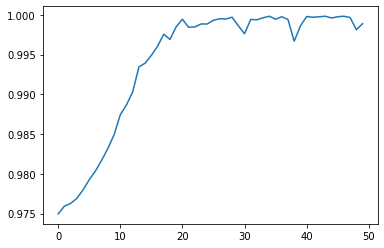

In [29]:
#history0 = history0b
#history0.history
# plot metrics
test = False
if test:
    _ = plt.plot(history0.history['msle'])
    _ = plt.plot(history0.history['mean_squared_error'])
    _ = plt.plot(history0.history['binary_accuracy'])
    _ = plt.plot(history0.history['categorical_accuracy'])
_ = plt.plot(history0.history['accuracy'])
_ = plt.show()

In [30]:
model0.summary()

# model.save_weights('file.h5')

# avec le model construit + les poids
# model.load_weights('file.h5')


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 198, 32)           128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 99, 32)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3168)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                158450    
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 102       
Total params: 158,680
Trainable params: 158,680
Non-trainable params: 0
_________________________________________________________________


### Figures

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


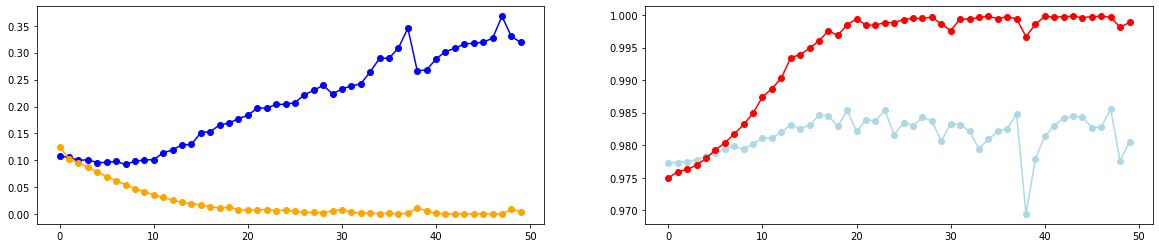

In [31]:
print(history0.history.keys())
coul = ["blue", "lightblue", "orange", "red"]

fig = plt.figure(figsize=(20,4))
_ = plt.subplot(1,2,1)
for i in range(0,4,2):
    _ = plt.plot(list(history0.history.values())[i],'k-o', color=coul[i])
_ = plt.subplot(1,2,2)
for j in range(1,4,2):
    _ = plt.plot(list(history0.history.values())[j],'k-o', color=coul[j])

In [32]:
print(history0.history.keys())
print(history0.history['val_accuracy'][-1])
print(history0.history['accuracy'][-1])
print(history0.history['val_loss'][-1])
print(history0.history['loss'][-1])


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])
0.9805120229721069
0.99887055
0.3189547115643628
0.004956907535991553


Test loss: 0.2997030418773244
Test accuracy: 0.9812542200088501
[0 0 0 0 0 0 0 0 0 0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


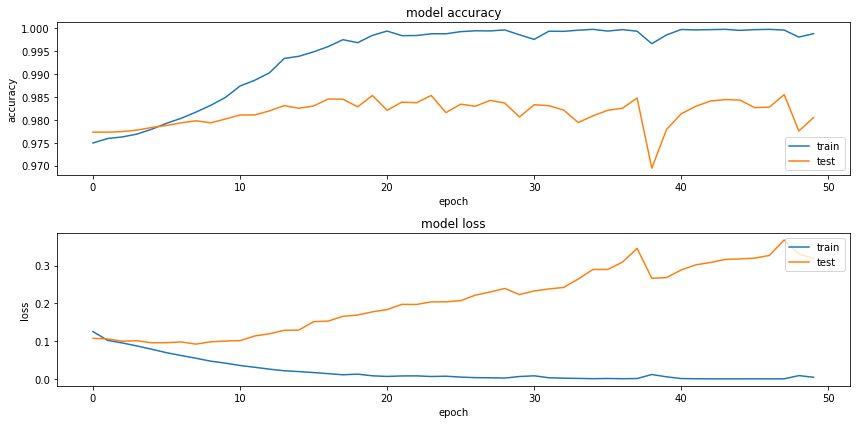

In [33]:
# RESULTATS
score = model0.evaluate(test_data2, test_labels, verbose=0, batch_size=batch_size)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# predictions
classes = model0.predict(test_data2, batch_size=batch_size)
predictions = model0.predict(test_data2[:10])
print(np.argmax(predictions, axis=1))
print(test_labels[:10,1])

# PLOTS
fig = plt.figure(figsize=(12,6))
_ = plt.subplot(2,1,1)
_ = plt.plot(history0.history['accuracy'])
_ = plt.plot(history0.history['val_accuracy'])
_ = plt.title('model accuracy')
_ = plt.xlabel('epoch')
_ = plt.ylabel('accuracy')
_ = plt.legend(['train','test'], loc='lower right')

_ = plt.subplot(2,1,2)
_ = plt.plot(history0.history['loss'])
_ = plt.plot(history0.history['val_loss'])
_ = plt.title('model loss')
_ = plt.xlabel('epoch')
_ = plt.ylabel('loss')
_ = plt.legend(['train','test'], loc='upper right')

_ = plt.tight_layout()
_ = fig

### Matrice de Confusion


 Echantillon Test: 5948
[[5757   60]
 [  50   81]]

 Echantillon Train: 23788
[[23156    92]
 [   69   471]]

 Normalisé:
Prédit       0.0       1.0
Reel                      
0.0     0.991390  0.354610
1.0     0.010332  0.574468

 testing1:
Predit   0.0  1.0   All
Reel                   
0.0     5757   50  5807
1.0       60   81   141
All     5817  131  5948


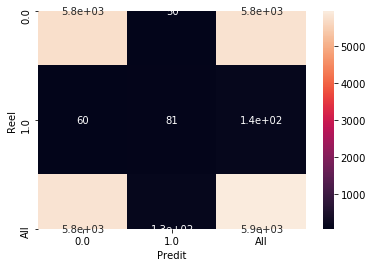


 testing2:
Predit       0.0       1.0  All
Reel                           
0.0     0.495695  0.004305  0.5
1.0     0.212766  0.287234  0.5
All     0.488988  0.011012  0.5


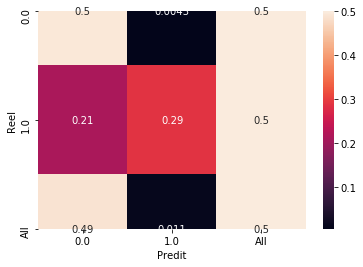

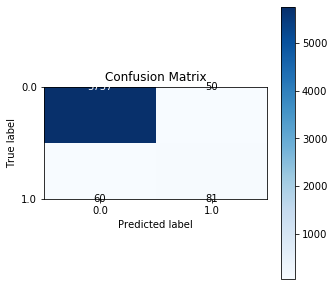

In [34]:
from sklearn.metrics import confusion_matrix
#       pip install scikit-plot
import scikitplot as skplt

# transforme les matrice en listes d'entiers binaires (0 ou 1)
Y11 = pd.DataFrame(model0.predict(test_data2)[:,1:])[0].round(0).tolist()
Y10 = pd.DataFrame(test_labels[:,1:])[0].tolist()
print("\n Echantillon Test:", len(Y11))
print(confusion_matrix(Y11, Y10))

Y01 = pd.DataFrame(model0.predict(train_data2)[:,1:])[0].round(0).tolist()
Y00 = pd.DataFrame(train_labels[:,1:])[0].tolist()
print("\n Echantillon Train:", len(Y01))
print(confusion_matrix(Y01, Y00))

y_reel = pd.Series(Y10, name='Reel')
y_pred = pd.Series(Y11, name='Prédit')

df_confusion = pd.crosstab(y_reel, y_pred)

df_conf_norm = df_confusion / df_confusion.sum(axis=1)
print("\n Normalisé:")
print(df_conf_norm)
print("\n testing1:")
df_confusion = pd.crosstab(y_reel, y_pred, rownames=['Reel'], colnames=['Predit'], margins=True)
print(df_confusion)
_ = sns.heatmap(df_confusion, annot=True)
plt.show()

df_conf_norm = df_confusion.div(df_confusion.sum(axis=1), axis=0)
print("\n testing2:")
print(df_conf_norm)
_ = sns.heatmap(df_conf_norm, annot=True)
plt.show()

######### NOT WORKING ???
#from pandas_ml import ConfusionMatrix
#confusion_matrix = ConfusionMatrix(y_reel, y_pred)
#confusion_matrix.plot()
#plt.show()
#confusion_matrix.plot(normalized=True)
#plt.show()

#binary_confusion_matrix = ConfusionMatrix(y_true, y_pred)
#print("Binary confusion matrix:\n%s" % binary_confusion_matrix)
#print(binary_confusion_matrix.TP) # TN, FP, FN, ...
#binary_confusion_matrix.plot(normalized=False)
#binary_confusion_matrix.plot(normalized=True, backend='seaborn')
#plt.show()
#confusion_matrix.print_stats()
#confusion_matrix.stats()
##########


skplt.metrics.plot_confusion_matrix(y_reel, y_pred, figsize=(5,5))

(5948, 4) (23788, 4)
(5807, 4) (141, 4) (23225, 4) (563, 4)

 ERREURS: 0_true     0.0
0_pred     0.0
0_pred2    0.0
diff       0.0
dtype: float64 0_true      0.000000
0_pred     43.527556
0_pred2    50.000000
diff      -50.000000
dtype: float64 0_true     0.0
0_pred     0.0
0_pred2    0.0
diff       0.0
dtype: float64 0_true      0.000000
0_pred     14.308169
0_pred2     0.000000
diff        0.000000
dtype: float64

 LOSS 0.018493611297915265


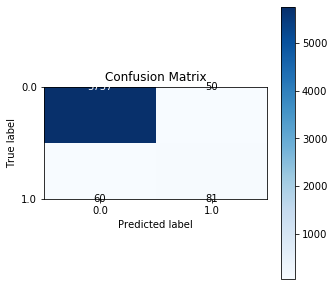

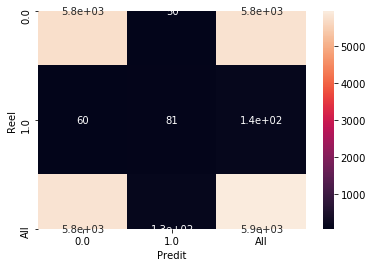

In [35]:
import scikitplot as skplt

def mse_loss(y_true, y_pred):
    # y_true and y_pred are numpy arrays of the same length.
    return ((y_true - y_pred) ** 2).mean()

def tab_result(df_a, df_b):
    # Extrait les matrices binaires en 1 seule colonne
    y_pred = pd.DataFrame(model0.predict(df_b)[:,1:])
    y_true = pd.DataFrame(df_a[:,1:])
    # création de la table
    dy = y_true.merge(y_pred, left_index=True, right_index=True, suffixes=('_true', '_pred'))
    dy['0_true'] = dy['0_true'].astype(int)
    dy['0_pred2'] = dy['0_pred'].round(0)   #arrondi à l'entier le + proche
    dy['diff'] = dy['0_true'] - dy['0_pred2']
    return dy

def lampe_results(df1, df2):
    df_10 = df1[df1['0_true'] == 0]
    df_11 = dy1[dy1['0_true'] == 1]
    df_20 = df2[df2['0_true'] == 0]
    df_21 = dy2[dy2['0_true'] == 1]
    return (df_10, df_11, df_20, df_21)

dy1 = tab_result(test_labels, test_data2)
dy2 = tab_result(train_labels, train_data2)
dy1.head(2)
dy2.head(2)
df_test_1, df_test_0, df_train_1, df_train_0 = lampe_results(dy1, dy2)

print(dy1.shape, dy2.shape)
print(df_test_1.shape, df_test_0.shape, df_train_1.shape, df_train_0.shape)
#print(df_test_0.describe())
true_pos1 = df_test_1[(df_test_1['0_pred2'] == 1) & (df_test_1['0_true'] == 1)].sum()
fals_pos1 = df_test_1[(df_test_1['0_pred2'] == 1) & (df_test_1['0_true'] == 0)].sum()
fals_neg1 = df_test_1[(df_test_1['0_pred2'] == 0) & (df_test_1['0_true'] == 1)].sum()
true_neg1 = df_test_1[(df_test_1['0_pred2'] == 0) & (df_test_1['0_true'] == 0)].sum()
print("\n ERREURS:", true_pos1, fals_pos1, fals_neg1, true_neg1)
#####################################
# sensitivity-recall : TPR = TP/P = TP / (TP + FN)
# specificity-select : TNR = TN/N = TN / (TN + FP)
# balance : = (TPR + TNR) / 2
# precision          : TP / (TP + FP)

# accuracy    : ACC = (TP + TN) / total
# FI score    :  2 * TP / (2 TP + FP + FN) == 2 / (1/precision + 1/recall)
#####################################


# calcul pour LOSS du Mean Squared Error
print("\n LOSS", mse_loss(y_reel, y_pred))

_ = skplt.metrics.plot_confusion_matrix(y_reel, y_pred, figsize=(5,5))
plt.show()

confusion_matrix(dy1['0_true'], dy1['0_pred2'])
sns.heatmap(df_confusion, annot=True)
plt.show()

# KERAS :  images bi-dimensionelles

### test séparation 

### tests

## Lecture des 3 fichiers de données

In [36]:

fichier1  = DATA_DIR3 + "data_LAS_nom_NUM_" + str(off) + ".npy"
data1     = np.load(fichier1)
fichier2  = DATA_DIR3 + "data_LAS_nom_ECA_" + str(off) + ".npy"
data2     = np.load(fichier2)
fichierY = DATA_DIR3 + "data_LAS_nom_POS_" + str(off) + ".npy"
data3    = np.load(fichierY)
#print(type(data1), type(data2))
print(data1.shape, data2.shape, data3.shape)

# concatenation de NUM et POS
data14 = tf.expand_dims(data1, 3)
data24 = tf.expand_dims(data2, 3)
data34 = tf.expand_dims(data1, 3)
print(data14.shape, data24.shape, data34.shape)

data_x = tf.concat([data14, data24], 3)
#data_x = tf.concat([data14, data24, data34], 3)
print(data_x.shape)

#data_x = data1
taille = data_x.shape[0]
print(taille)
data_y   = np.load(fichierY).reshape(taille,100)

print("Fichiers utilisés:\n", fichier1, "\n", fichier2, "\n", fichierY, "\n", data_x.shape)
print("Classification utiliseé:\n", fichierY, "\n", data_y.shape)

Nomb_Input = data_x.shape

(29384, 10, 10) (29384, 10, 10) (29384, 10, 10)
(29384, 10, 10, 1) (29384, 10, 10, 1) (29384, 10, 10, 1)
(29384, 10, 10, 2)
29384
Fichiers utilisés:
 /Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/data_LAS_nom_NUM_29384.npy 
 /Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/data_LAS_nom_ECA_29384.npy 
 /Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/data_LAS_nom_POS_29384.npy 
 (29384, 10, 10, 2)
Classification utiliseé:
 /Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/data_LAS_nom_POS_29384.npy 
 (29384, 100)


In [37]:
# somme sur toutes les rangées ou colonnes   présence de valeurs SUPERIEURES A 1 (3x à 2 !!!)
df_Y = pd.DataFrame(data_y)
df_Y['lamp'] = df_Y.sum(axis=1)
df_Y['lamp2'] = df_Y[:-1].sum(axis=0)
print(df_Y.shape, df_Y['lamp'].sum())
print(df_Y.shape[0], len(df_Y[df_Y['lamp'] == 0]), df_Y[df_Y['lamp'] == 1].shape[0], df_Y[df_Y['lamp'] > 1].shape[0])

#  Ecrase les valeurs de 2  ... pour avoir des 0 ou des 1
df_Y.loc[df_Y['lamp'] > 1] = 1
print(df_Y.shape[0], len(df_Y[df_Y['lamp'] == 0]), df_Y[df_Y['lamp'] == 1].shape[0], df_Y[df_Y['lamp'] > 1].shape[0])
df_Y[df_Y['lamp'] == 2]



(29384, 102) 354.0
29384 29033 348 3
29384 29033 351 0


,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,lamp,lamp2


In [38]:
# lampes0 autre DataFrame avec les indice de présence des lampadaires ... CORRECTS ? ... pas cohérent
df_tot = df_Y.merge(lampes0, left_index=True, right_index=True)
df_tot['diff'] = df_tot['present'] - df_tot['lamp']
print(df_tot.shape, lampes0.shape,df_Y.shape )

test = False
if test:
    print(df_tot[df_tot['diff'] == 2].count(axis=0))
    print(df_tot[df_tot['diff'] == 1].count(axis=0))
    print(df_tot[df_tot['diff'] == 0].count(axis=0))
    print(df_tot[df_tot['diff'] == -1].count(axis=0))
    print(df_tot[df_tot['diff'] == -2].count(axis=0))
df_tot['diff'].describe()


(29384, 112) (40000, 9) (29384, 102)


count    29384.000000
mean        -0.003505
std          0.140816
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: diff, dtype: float64

In [39]:
df_tot[df_tot['diff'] == -1]

,0,1,2,3,4,5,6,7,8,9,...,present,NumI,NumY,NumX,X,Y,nom_NUM,nom_ECA,nom_POS,diff
29032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,29032,32,145,2043225,7272160,2043225_7272160_NumPoints5m.tif,2043225_7272160_EcartZ5m.tif,2043225_7272160_Position5m.tif,-1.0
29033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,29033,33,145,2043225,7272165,2043225_7272165_NumPoints5m.tif,2043225_7272165_EcartZ5m.tif,2043225_7272165_Position5m.tif,-1.0
29034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,29034,34,145,2043225,7272170,2043225_7272170_NumPoints5m.tif,2043225_7272170_EcartZ5m.tif,2043225_7272170_Position5m.tif,-1.0
29035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,29035,35,145,2043225,7272175,2043225_7272175_NumPoints5m.tif,2043225_7272175_EcartZ5m.tif,2043225_7272175_Position5m.tif,-1.0
29036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,29036,36,145,2043225,7272180,2043225_7272180_NumPoints5m.tif,2043225_7272180_EcartZ5m.tif,2043225_7272180_Position5m.tif,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,29379,179,146,2043230,7272895,2043230_7272895_NumPoints5m.tif,2043230_7272895_EcartZ5m.tif,2043230_7272895_Position5m.tif,-1.0
29380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,29380,180,146,2043230,7272900,2043230_7272900_NumPoints5m.tif,2043230_7272900_EcartZ5m.tif,2043230_7272900_Position5m.tif,-1.0
29381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,29381,181,146,2043230,7272905,2043230_7272905_NumPoints5m.tif,2043230_7272905_EcartZ5m.tif,2043230_7272905_Position5m.tif,-1.0
29382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,29382,182,146,2043230,7272910,2043230_7272910_NumPoints5m.tif,2043230_7272910_EcartZ5m.tif,2043230_7272910_Position5m.tif,-1.0


In [40]:
df_Y.describe()

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,lamp,lamp2
count,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000,...,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000,103.000000
mean,0.000340,0.000204,0.000306,0.000204,0.000102,0.000136,0.000170,0.000272,0.000306,0.000306,...,0.000238,0.000238,0.000306,0.000170,0.000306,0.000204,0.000306,0.000136,0.011945,3.456311
std,0.018445,0.014288,0.017499,0.014288,0.010104,0.011667,0.013044,0.016498,0.017499,0.017499,...,0.015433,0.015433,0.017499,0.013044,0.017499,0.014288,0.017499,0.011667,0.108642,1.923929
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


In [41]:
len0 = df_Y[df_Y['lamp'] == 0].shape[0]
len1 = df_Y.shape[0] - len0
print(len0, len1)

df_test = pd.DataFrame(y_binary)

test1 = df_test.loc[np.r_[:int(len0*0.8),len0:len0+int(len1*0.8)]]
test2 = df_test.loc[np.r_[int(len0*0.8):len0,len0+int(len1*0.8):len0+len1]]
                    
print(df_test.shape, len0, len0+int(len1*0.8), int(len0*0.8), int(len1*0.8), test1.shape, test2.shape)

29033 351
(29736, 2) 29033 29313 23226 280 (23506, 2) (5878, 2)


In [42]:
data_x0a = data_x[:int(len0*0.8)]
data_x0b = data_x[len0:len0+int(len1*0.8)]
data_x1a = data_x[int(len0*0.8):len0]
data_x1b = data_x[len0+int(len1*0.8):]
print(data_x0a.shape, data_x0b.shape,data_x1a.shape, data_x1b.shape)

#data_x0 = np.concatenate(data_x0a, data_x0b, axis=1)
data_x0 = tf.keras.backend.concatenate((data_x0a, data_x0b), axis=0)
data_x1 = tf.keras.backend.concatenate((data_x1a, data_x1b), axis=0)
print(data_x0.shape,data_x1.shape)

(23226, 10, 10, 2) (280, 10, 10, 2) (5807, 10, 10, 2) (71, 10, 10, 2)
(23506, 10, 10, 2) (5878, 10, 10, 2)


### Séparation Train - Test 

In [54]:

#########   problemes d'arrondis   ????  #######
#### pas le meme nombre de lignes pour les 2 manières différentes d'extraire les lignes  ????
df_testY = pd.DataFrame(y_binary)
y0 = df_testY.loc[np.r_[:int(len0*0.8),len0:len0+int(len1*0.8)],:]
y1 = df_testY.loc[np.r_[int(len0*0.8):len0,len0+int(len1*0.8):len0+len1],:]
print(y0.shape, y1.shape)

data_x0a = data_x[:int(len0*0.8)]
data_x0b = data_x[len0:len0+int(len1*0.8)]
data_x1a = data_x[int(len0*0.8):len0]
data_x1b = data_x[len0+int(len1*0.8):]
print(data_x0a.shape, data_x0b.shape,data_x1a.shape, data_x1b.shape)

#data_x0 = np.concatenate(data_x0a, data_x0b, axis=1)
data_x0 = tf.keras.backend.concatenate((data_x0a, data_x0b), axis=0)
data_x1 = tf.keras.backend.concatenate((data_x1a, data_x1b), axis=0)
print(data_x0.shape,data_x1.shape)

#X10, X11 = tf.split(X1, [:], 0)
#Y10, Y11 = tf.split(y_binary, [[len0 * 0.8:len0,len0+len1*0.8:]], 0)

#print(X10.shape, Y10.shape, X11.shape)

(23506, 2) (5878, 2)
(23226, 10, 10, 2) (280, 10, 10, 2) (5807, 10, 10, 2) (71, 10, 10, 2)
(23506, 10, 10, 2) (5878, 10, 10, 2)


In [65]:
from sklearn.model_selection import train_test_split 
from keras.utils import to_categorical

# Charge et split les données
###############   TODO      ###############
####### fonctionne avec les 2 cubes/images 
X = data_x
####### Si ne fonctionne pas avec les 2 cubes/images 
# X = data1
print("Dimensions X:", X.shape)
##############################################
#####   calcul de la position de la lampe dans le carré N
###  Passage mode binaire à une liste de 100
############
# Manière 1 de 
y = liste_y
# Manière 2 ... directe à partir des 3 mêmes fichiers 10x10
y = df_Y['lamp']

y_binary = to_categorical(y)
print("Dimensions Y:", y_binary.shape, len(y))
#
# y = data_y
# print(y.shape)
#############################

# tfds   tensorflow dataset splitting
# test_split, valid_split, train_split = tfds.Split.TRAIN.subsplit([10, 15, 75])
# PYTORCH   torchtext.data.Dataset
# split(split_ratio=0.7, stratified=False, strata_field='label', random_state=None

methode = 'test3'
#methode = 'SKLEARN'

if methode == 'test':
    all = tf.data.Dataset.from_tensor_slices(X).shuffle(10, reshuffle_each_iteration=False)
    n_row = int(X.shape[0] * 0.8)
    train_data, test_data     = X[:n_row,:,:,:], X[n_row:,:,:,:]
    train_labels, test_labels = y_binary[:n_row,:], y_binary[n_row:,:]
    
if methode == 'test2':
    len0 = df_Y[df_Y['lamp'] == 0].shape[0]
    len1 = df_Y.shape[0] - len0
    
    train_data, test_data = tf.split(X, [n_row1, n_row2], 0)
    train_labels, test_labels = tf.split(y_binary, [n_row1, n_row2], 0)
    
if methode == 'test3':
    train_data, test_data     = (data_x0, data_x1)
    train_labels, test_labels = (y0, y1)
print(y0.shape, y1.shape)
if methode == 'shuffle':
    fraction = 20
    #all = tf.data.Dataset.from_tensor_slices(list(range(1, 21))).shuffle(10, reshuffle_each_iteration=False)
    #test_data = all.enumerate().filter(lambda x,y: x % int(100/fraction) == 0).map(lambda x,y: y)
    
# dim = len(keras.backend.int_shape(X))
# if dim = 2:
# Avec SKLEARN
if methode == 'SKLEARN':
    train_data, test_data, train_labels, test_labels = train_test_split(
        X, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
#        X, y, test_size=0.2, random_state=42, stratify=y)

#print(train_data.shape, train_labels.shape, test_data.shape, test_labels.shape)
print("Train et Test:", train_data.shape, len(train_labels), test_data.shape, len(test_labels))

#train_data = np.expand_dims(train_data, axis=3)
#test_data = np.expand_dims(test_data, axis=3)

#### Ce n'est plus nécessaire si X est un Tenseur 4D
#train_data = train_data.reshape(train_data.shape[0], 10, 10, 1)
#test_data  = test_data.reshape(test_data.shape[0], 10, 10, 1)

#print(train_data.shape, train_labels.shape, test_data.shape, test_labels.shape)
print(train_data.shape, len(train_labels), test_data.shape, len(test_labels), y1.shape)
print(y0.shape, y0[:].shape, y1.shape)

Dimensions X: (29384, 10, 10, 2)
Dimensions Y: (29384, 2) 29384
(23506, 2) (5878, 2)
Train et Test: (23506, 10, 10, 2) 23506 (5878, 10, 10, 2) 5878
(23506, 10, 10, 2) 23506 (5878, 10, 10, 2) 5878 (5878, 2)
(23506, 2) (23506, 2) (5878, 2)


In [45]:
#print(pd.DataFrame(train_labels).describe())
#print(pd.DataFrame(test_labels).describe())

## Modèles CNN 2D

In [101]:
print(train_data.shape, train_labels.shape,df_Y.shape, y_binary.shape, len(y))

# 2) Train CONVNET on the MNIST dataset
dim = len(keras.backend.int_shape(train_data))

epochs = 30
#  steps PROBLEMES si différent de 1 pour les derniers plots
batch_size = 1   
ratio = 10 * 401 / 70
poids_class = {0: 1., 1: ratio}
if dim == 2:
    input_shape = (10, 10)
if dim == 4:
    input_shape = (10, 10, 2)

filters = (5,5)
strides=(1,1)
pool_size=(2,2)

model2 = Sequential([
    Conv2D(6, filters, padding="same", strides=strides, input_shape=input_shape),
    MaxPooling2D(pool_size=pool_size),
    Conv2D(16, filters, padding="same", strides=strides),
    MaxPooling2D(pool_size=pool_size),
    Flatten(),
    Dense(120, activation='relu'),
    #Dropout(0.1),
    Dense(100, activation='relu'),
    #Dropout(0.1),
#    Dense(2, activation='sigmoid')   #  'softmax'
    Dense(2, activation='softmax')
])

#model2.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(),
#              metrics=['accuracy'])
model2.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adadelta(),
#model2.compile(loss=keras.losses.mse, optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

#  si TENSOR = 2D
if dim == 2:
    history2 = model2.fit(train_data, train_labels, batch_size=batch_size, epochs=epochs, 
                          class_weight=poids_class,  # ou   'balanced'
          verbose=1, validation_data=(test_data, test_labels))
    score = model2.evaluate(test_data, test_labels, verbose=0)
elif dim == 4:
#    history2 = model2.fit_generator(train_data, train_labels, verbose=1)      
    history2 = model2.fit(train_data, train_labels, epochs=epochs, verbose=1, 
#                          # class_weight=poids_class,   #  ValueError:  NOT supported for 3+ dimensional targets
                        validation_freq=.33, steps_per_epoch=2)
    score = model2.evaluate(test_data, test_labels, steps=3, verbose=0)
else:
    print("WRONG tensor dimension inputs ....")

print('Test loss:', score[0])
print('Test accuracy:', score[1])

(23506, 10, 10, 2) (23506, 2) (29384, 102) (29384, 2) 29384
Epoch 1/30
2/2 [==============================] - 4s 2s/step - loss: 0.5221 - accuracy: 0.9495
Epoch 2/30
2/2 [==============================] - 3s 1s/step - loss: 0.2979 - accuracy: 0.9881
Epoch 3/30
2/2 [==============================] - 3s 1s/step - loss: 0.1954 - accuracy: 0.9881
Epoch 4/30
2/2 [==============================] - 3s 1s/step - loss: 0.1531 - accuracy: 0.9881
Epoch 5/30
2/2 [==============================] - 3s 1s/step - loss: 0.1371 - accuracy: 0.9881
Epoch 6/30
2/2 [==============================] - 3s 1s/step - loss: 0.1302 - accuracy: 0.9881
Epoch 7/30
2/2 [==============================] - 3s 1s/step - loss: 0.1262 - accuracy: 0.9881
Epoch 8/30
2/2 [==============================] - 3s 1s/step - loss: 0.1231 - accuracy: 0.9881
Epoch 9/30
2/2 [==============================] - 3s 1s/step - loss: 0.1204 - accuracy: 0.9881
Epoch 10/30
2/2 [==============================] - 3s 1s/step - loss: 0.1179 - accura

### Sommaire

In [102]:
model2.summary()

# model.save_weights('file.h5')
# avec le model construit + les poids
# model.load_weights('file.h5')

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 10, 10, 6)         306       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 6)           0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 5, 5, 16)          2416      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 2, 2, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 120)               7800      
_________________________________________________________________
dense_10 (Dense)             (None, 100)              

### Figures

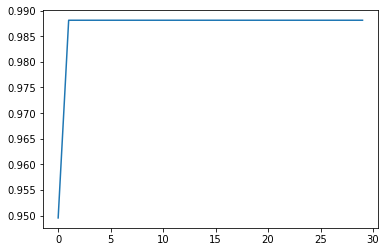

In [103]:
#history0.history
# plot metrics
#_ = plt.plot(history2.history['binary_accuracy'])
_ = plt.plot(history2.history['accuracy'])
_ = plt.show()

dict_keys(['loss', 'accuracy'])
0 blue [[0.5220988541841507, 0.29790733754634857, 0.19544967263936996, 0.15307647734880447, 0.13709378987550735, 0.13023949414491653, 0.12618078291416168, 0.12307222560048103, 0.12037937715649605, 0.11792454868555069, 0.11561962962150574, 0.11343282833695412, 0.11134213209152222, 0.10930892452597618, 0.10736515372991562, 0.10548539459705353, 0.10366757214069366, 0.10190451145172119, 0.10020801424980164, 0.09857508540153503, 0.09701179713010788, 0.09551037102937698, 0.09408137202262878, 0.09271569177508354, 0.09141900390386581, 0.09018949791789055, 0.08899876847863197, 0.08786823600530624, 0.08679499477148056, 0.08577805384993553], [0.9495342, 0.9881307, 0.9881307, 0.9881307, 0.9881307, 0.9881307, 0.9881307, 0.9881307, 0.9881307, 0.9881307, 0.9881307, 0.9881307, 0.9881307, 0.9881307, 0.9881307, 0.9881307, 0.9881307, 0.9881307, 0.9881307, 0.9881307, 0.9881307, 0.9881307, 0.9881307, 0.9881307, 0.9881307, 0.9881307, 0.9881307, 0.9881307, 0.9881307, 0.9881307

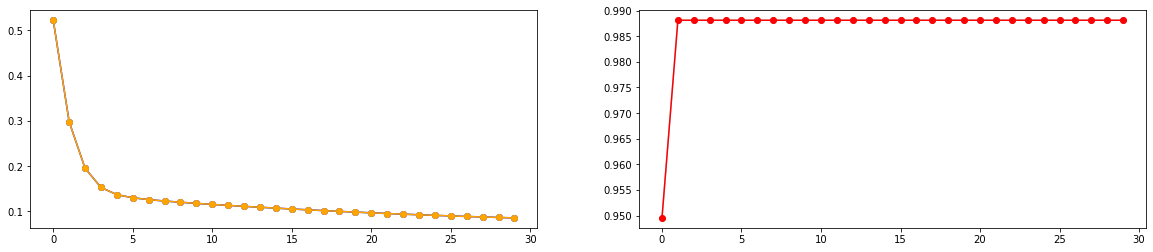

In [104]:
print(history2.history.keys())
coul = ["blue", "lightblue", "orange", "red"]

fig = plt.figure(figsize=(20,4))
_ = plt.subplot(1,2,1)
for i in range(0,4,2):
    print(i,coul[i], list(history2.history.values()))
    #_ = plt.plot(list(history2.history.values())[i],'k-o', color=coul[i])
    _ = plt.plot(list(history2.history.values())[0],'k-o', color=coul[i])
_ = plt.subplot(1,2,2)
for j in range(1,4,2):
    _ = plt.plot(list(history2.history.values())[1],'k-o', color=coul[j])

Test loss: 0.08676376938819885
Test accuracy: 0.9877509474754333
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
(5878, 2) <class 'pandas.core.frame.DataFrame'>


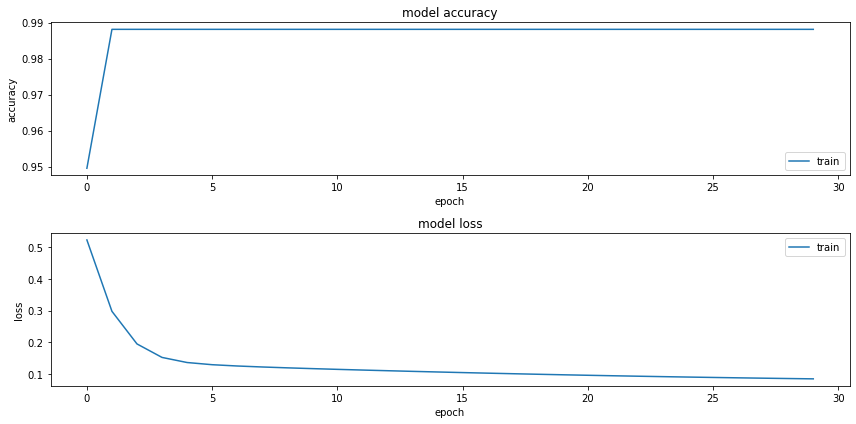

In [105]:
# RESULTATS

if dim == 2:
    score = model2.evaluate(test_data, test_labels, verbose=0, batch_size=batch_size)
    classes = model2.predict(test_data, batch_size=batch_size)
    predictions = model2.predict(test_data[:10])
if dim == 4:
    score = model2.evaluate(test_data, test_labels, verbose=0, steps=batch_size)
    classes = model2.predict(test_data, steps=batch_size)
    predictions = model2.predict(test_data[:100], steps=batch_size)
    
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# predictions
 #predictions = model2.predict_classes(test_data[:10])
print(np.argmax(predictions, axis=1))
print(test_labels.shape, type(test_labels))

######## TypeError: '(slice(None, 100, None), slice(0, 1, None))' is an invalid key
#print(test_labels[:100,0:1])

# PLOTS
fig = plt.figure(figsize=(12,6))
_ = plt.subplot(2,1,1)
_ = plt.plot(history2.history['accuracy'])
if dim == 2:
    _ = plt.plot(history2.history['val_accuracy'])
_ = plt.title('model accuracy')
_ = plt.xlabel('epoch')
_ = plt.ylabel('accuracy')
_ = plt.legend(['train','test'], loc='lower right')

_ = plt.subplot(2,1,2)
_ = plt.plot(history2.history['loss'])
if dim == 2:
    _ = plt.plot(history2.history['val_loss'])
_ = plt.title('model loss')
_ = plt.xlabel('epoch')
_ = plt.ylabel('loss')
_ = plt.legend(['train','test'], loc='upper right')

_ = plt.tight_layout()
_ = fig

### Matrice de confusion

In [106]:
print(data_x0.shape, y0[:].shape, y0[1:].shape)
y0[:]

(23506, 10, 10, 2) (23506, 2) (23505, 2)


,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
29308,0.0,1.0
29309,0.0,1.0
29310,0.0,1.0
29311,0.0,1.0


In [107]:
print(test_data.shape, test_labels[1:].shape)

(5878, 10, 10, 2) (5877, 2)


start tensor 4D
Echantillon Train: (23506, 10, 10, 2) 23506 23506
Echantillon Test: 5878 5878
(23506,) (23506, 1) (5878,) (5878, 1)
SOMME réelle:  279.0 72.0
SOMME prédite: 0.0 0.0


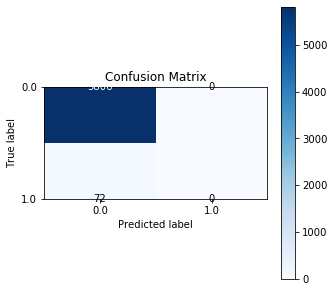


 Predit       0.0       1.0       All
Reel                                
0.0     0.495695  0.177305  0.488147
1.0     0.005166  0.287234  0.011853
All     0.500861  0.464539  0.500000

 Predit       0.0       1.0  All
Reel                           
0.0     0.495695  0.004305  0.5
1.0     0.212766  0.287234  0.5
All     0.488988  0.011012  0.5


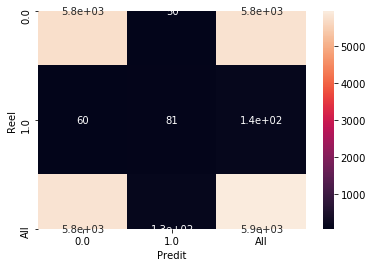

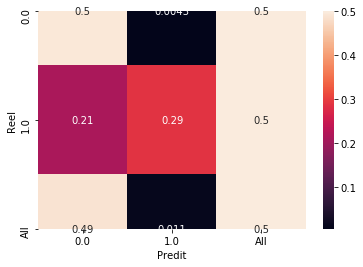

In [108]:
from sklearn.metrics import confusion_matrix
#       pip install scikit-plot
import scikitplot as skplt

# transforme les matrice en listes d'entiers binaires (0 ou 1)
if dim == 2:
    print("start matrice 2D")
    Y01 = pd.DataFrame(model2.predict(train_data, steps=batch_size)[:,1:])[0].round(0).tolist()
    Y11 = pd.DataFrame(model2.predict(test_data, steps=batch_size)[:,1:])[0].round(0).tolist()
    Y00 = pd.DataFrame(train_labels[:,1:])[0].tolist()
    Y10 = pd.DataFrame(test_labels[:,1:])[0].tolist()

if dim == 4:
    print("start tensor 4D")
    Y01 = model2.predict(train_data, steps=batch_size)[:].round(0).tolist()
    Y11 = model2.predict(test_data, steps=batch_size)[:].round(0).tolist()
    Y00 = train_labels[:]
    Y10 = test_labels[:]
#    Y10 = test_labels[1:].numpy().tolist()
    
print("Echantillon Train:", train_data.shape, len(Y00), len(Y01))
#confusion_matrix(Y01, Y00)

print("Echantillon Test:", len(Y10), len(Y11))
#confusion_matrix(Y11, Y10)
if dim == 2:
    y_reel = pd.Series(Y10, name='Reel_test')
    y_pred = pd.Series(Y11, name='Prédit_test')
if dim == 4:
#    y_reel = test_labels[1:].numpy()
    y_reel0 = train_labels[1]
    y_pred0 = model2.predict(train_data, steps=batch_size).round(0)[:,1:]
    y_reel = test_labels[1]
    y_pred = model2.predict(test_data, steps=batch_size).round(0)[:,1:]

if dim == 2:
    #df_confusion = pd.crosstab(y_reel, y_pred, rownames=['Reel_test'], colnames=['Predit_test'], margins=True)
    print("\n", df_confusion)

print(y_reel0.shape, y_pred0.shape, y_reel.shape, y_pred.shape,)
print("SOMME réelle: ", y_reel0.sum(), y_reel.sum())
print("SOMME prédite:", y_pred0.sum(), y_pred.sum())
#
skplt.metrics.plot_confusion_matrix(y_reel, y_pred, figsize=(5,5))
plt.show()
#
df_conf_norm = df_confusion / df_confusion.sum(axis=1)
print("\n", df_conf_norm)
df_conf_norm = df_confusion.div(df_confusion.sum(axis=1), axis=0)
print("\n", df_conf_norm)

_ = sns.heatmap(df_confusion, annot=True)
plt.show()
_ = sns.heatmap(df_conf_norm, annot=True)
plt.show()

In [109]:
y_reel
print("SOMME réelle: ", y_reel.sum())
print("SOMME prédite:", y_pred.sum())

SOMME réelle:  72.0
SOMME prédite: 0.0


# KERAS hyperparametres

In [301]:
from sklearn.model_selection import GridSearchCV

from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor

def create_model(neurons=1, optimizer='adam', dropout_rate=0.0, learn_rate=0.01, momentum=0, 
                 init_mode='uniform', activation='relu', dropout_rate=0.0, weight_constraint=0):
    # create model
    model = Sequential()
    model.add(Dense(neurons, kernel_initializer=init_mode, input_dim=8, activation=activation)'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid'))
    # Compile model
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# fix random seed for reproducibility
seed = 42
numpy.random.seed(seed)
# load dataset

dataset = 
# split into input (X) and output (Y) variables
X = dataset
Y = dataset

# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, dropout_rate=0.2, verbose=0)

              
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
weight_constraint = [i for i in range (1, 6, 1)]
dropout_rate = [i/10 for i in range (0, 10, 1)]
neurons = [1, 5, 10, 15, 20, 25, 30]

param_grid = dict(neurons=neurons, learn_rate=learn_rate, momentum=momentum, optimizer=optimizer, 
                init_mode=init_mode, batch_size=batch_size, epochs=epochs, activation=activation,
                dropout_rate=dropout_rate, weight_constraint=weight_constraint)
#  score = ???
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)   # n_jobs=-1  parallisation
grid_result = grid.fit(X, Y)

# summarize results ==>  best_score et best_params_
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

SyntaxError: invalid syntax (<ipython-input-301-ded477e1019e>, line 19)